In [13]:
# Autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Q[1]

Run your reduceWidth function on the provided austin.jpg with numPixels= 100
(in other words, shrink the height by 100 pixels). Run your reduceHeight function on the
provided disney.jpg with numPixels= 100 (in other words, shrink the height by 100 pixels).
Display the outputs. 

In [ ]:
from utils import read_image, show_image, show_grid
from reduceWidth import reduceWidth
from reduceHeight import reduceHeight

img = read_image('./austin.jpg')

resized_img_austin = reduceWidth(img, 100)

show_grid(
    [img, resized_img_austin], 
    [f'Original {img.shape}', f'Resized {resized_img_austin.shape}'], 
    axis='off'
)

img = read_image('./disney.jpg')

resized_img_disney = reduceHeight(img, 100)

show_grid(
    [img, resized_img_disney], 
    [f'Original {img.shape}', f'Resized {resized_img_disney.shape}'], 
    axis='off'
)

### Q[2]

Display (a) the energy function output (eq. (1) for the provided image austin.jpg, and (b) the
two corresponding cumulative minimum energy maps M(I,j) for the seams in each direction.


In [3]:
img = read_image('./austin.jpg')

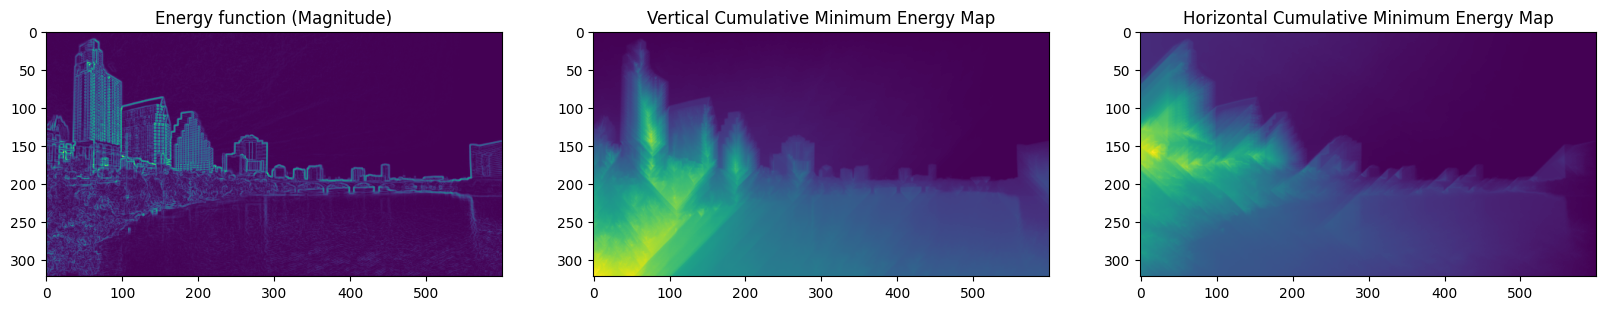

In [4]:
from energy_functions import compute_magnitude
from energy_map import *
from utils import show_grid

magnitude = compute_magnitude(img)
M_v = compute_vertical_cumulative_energy_map(img)
M_h = compute_horizontal_cumulative_energy_map(img)
show_grid([magnitude, M_v, M_h], titles=['Energy function (Magnitude)', 'Vertical Cumulative Minimum Energy Map', 'Horizontal Cumulative Minimum Energy Map'])

### Q[3]

For the same image austin.jpg, display the original image together with (a) the first selected
horizontal seam and (b) the first selected vertical seam.

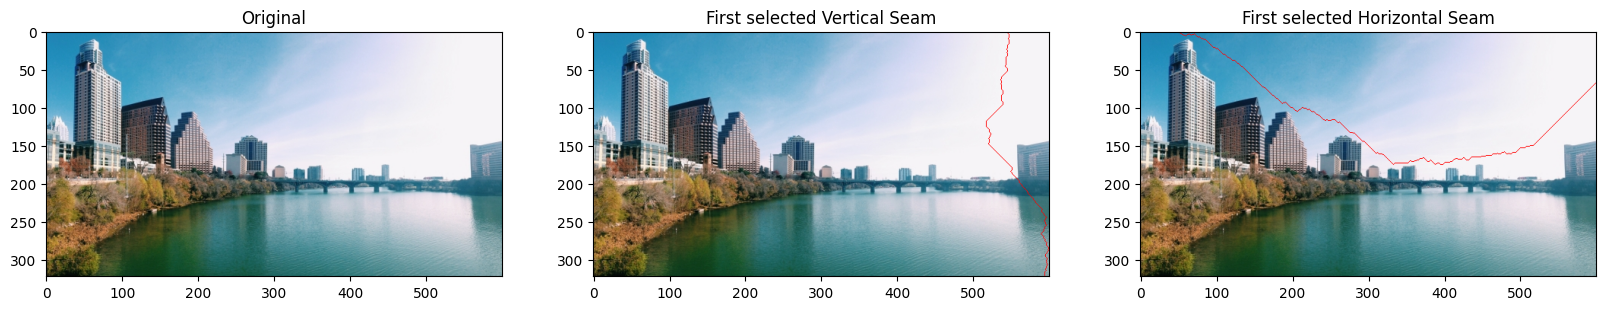

In [5]:
from seams import *
from utils import *

img = read_image('./austin.jpg')

vertical_seam = find_vertical_seam(img, energy_type='magnitude')
horizontal_seam = find_horizontal_seam(img, energy_type='magnitude')

show_grid(
    [img, add_vseam_to_img(img, vertical_seam, color=(255,0,0)), add_hseam_to_img(img, horizontal_seam, color=(255,0,0))],
    ['Original', 'First selected Vertical Seam', 'First selected Horizontal Seam']
)

### Q[4]

Make some change to the way the energy function is computed (i.e., filter used, its parameters, or
incorporating some other a priori knowledge). Display the result and explain the impact on the
results for some example.

(322, 600, 3)


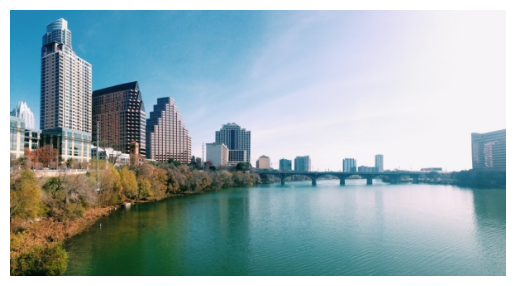

In [6]:
from utils import read_image, show_image

img = read_image('./austin.jpg')
print(img.shape)
show_image(img)

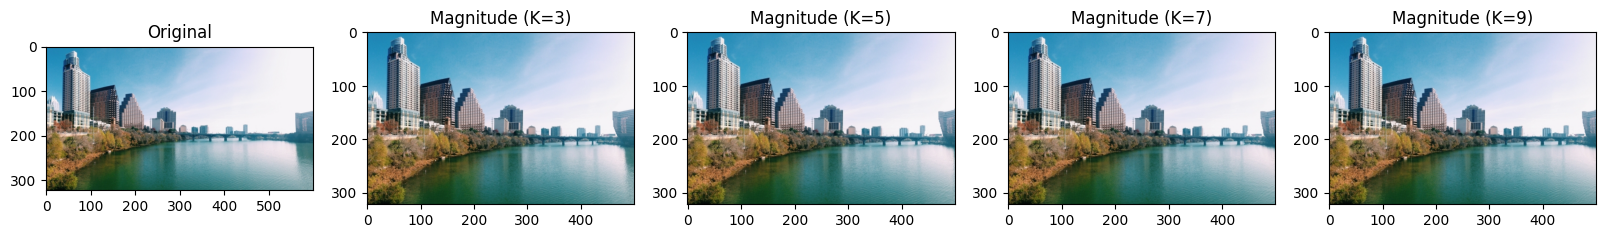

In [12]:
from reduceWidth import reduceWidth

show_grid(
    imgs=[
        img, 
        reduceWidth(img, 100, energy_type='magnitude', k=3), 
        reduceWidth(img, 100, energy_type='magnitude', k=5),
        reduceWidth(img, 100, energy_type='magnitude', k=7),
        reduceWidth(img, 100, energy_type='magnitude', k=9)
    ], 
    
    titles=[
        'Original',
        'Magnitude (K=3)', 
        'Magnitude (K=5)', 
        'Magnitude (K=7)', 
        'Magnitude (K=9)', 
    ]
)

### Q[5]

Now, for the real results! Use your system with different kinds of images and seam combinations and see what kind of interesting results it can produce. The goal is to form some perceptually pleasing outputs where the resizing better preserves content than a blind resizing would, as well as some examples where the output looks unrealistic or has artifacts. Include results for at least three images of your own selection. Include an example or two of a “bad” outcome. Be creative in the images you choose, and in the amount of combined vertical and horizontal carvings you apply. 

Try to predict types of images where you might see something interesting happen. It’s ok to fiddle with the parameters (seam sequence, number of seams, etc.) to look for interesting and explainable outcomes. For each result, include the following things, clearly labeled (the title function may be useful here): 
* (a) the original input image, 
* (b) your system’s resized image, 
* (c) the result one would get if instead a simple resampling were used (via Matlab’s imresize), 
* (d) the input and output image dimensions, 
* (e) the sequence of enlargements and removals that were used, and 
* (f) a brief qualitative explanation of what we’re seeing in the output.

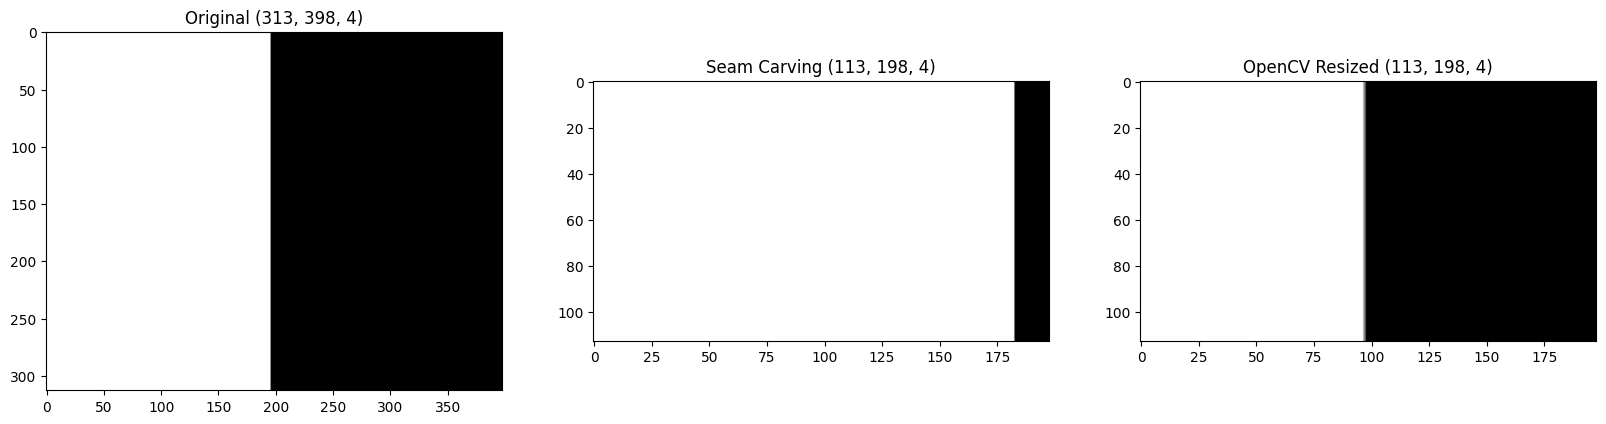

In [33]:
from utils import read_image, show_image

original_img = read_image('./untitled.png', gray=False)
height, width = original_img.shape[0], original_img.shape[1]


w_removals, h_removals = [100, 100], [100, 100]
total_w = sum(w_removals)
total_h = sum(h_removals)

cv2_resized_img = cv2.resize(original_img, (width-total_w, height-total_h), interpolation=cv2.INTER_LINEAR)

# loop over the zipped w_removals and h_removals
sc_resized_img = original_img.copy()
for (w, h) in zip(w_removals, h_removals):
    sc_resized_img = reduceHeight(sc_resized_img, h, energy_type='laplacian', k=5)
    sc_resized_img = reduceWidth(sc_resized_img, w, energy_type='laplacian', k=5)
    
show_grid(
    [original_img, sc_resized_img, cv2_resized_img], 
    [f'Original {original_img.shape}', f'Seam Carving {sc_resized_img.shape}', f'OpenCV Resized {cv2_resized_img.shape}']
)